In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [30]:
df = pd.read_csv('2022.csv')
df = df.iloc[:, 1:3]
df.head()


,Country,Happiness score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415


In [31]:
df2 = pd.read_csv('air_pollution.csv')
df2 = df2.iloc[:, [0,1,7]]
df2.head()

,City,Country,2022
0,Kabul,Afghanistan,17.1
1,Tirana,Albania,14.5
2,Algiers,Algeria,17.8
3,Ordino,Andorra,5.4
4,Luanda,Angola,8.8


In [32]:
df3 = pd.read_csv('countries.csv')
df3.head()

,Continent,Country,City
0,Europe,Albania,Tirana
1,Europe,Andorra,Andorra la Vella
2,Europe,Armenia,Yerevan
3,Europe,Austria,Vienna
4,Europe,Azerbaijan,Baku


In [33]:
import pandas as pd


# Sort both DataFrames
df1_sorted = df2.sort_values(by='Country')
df2_sorted = df3.sort_values(by='Country')
df3_sorted = df.sort_values(by='Country')

# Merge DataFrames on column 'A' with inner join
result = pd.merge(df1_sorted,df2_sorted, on=['Country','City' ], how='right')
result = pd.merge(result,df3_sorted, on=['Country'], how='right')



result.to_csv('2022Data.csv', index=False)

result.head()


,City,Country,2022,Continent,Happiness score
0,Kabul,Afghanistan,17.1,Asia,2.404
1,Tirana,Albania,14.5,Europe,5.199
2,Algiers,Algeria,17.8,Africa,5.122
3,Buenos Aires,Argentina,14.2,South America,5.967
4,Yerevan,Armenia,31.4,Asia,5.399


In [34]:
analysis = pd.read_csv('2022Data.csv')
analysis = analysis.iloc[:,[3,1,2,4]]
analysis = analysis.dropna()
analysis = analysis.rename(columns={"2022": "PM2.5", "Happiness score": "Happiness Score"})
analysis.to_csv('2022Data.csv', index=False)
analysis.head()

,Continent,Country,PM2.5,Happiness Score
0,Asia,Afghanistan,17.1,2.404
1,Europe,Albania,14.5,5.199
2,Africa,Algeria,17.8,5.122
3,South America,Argentina,14.2,5.967
4,Asia,Armenia,31.4,5.399


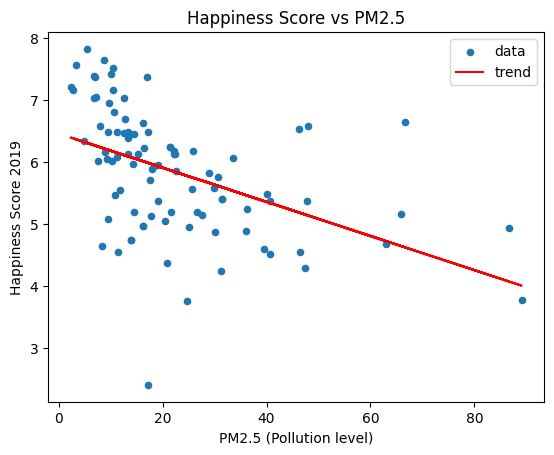

In [35]:
fig, ax = plt.subplots()
ax = analysis.plot.scatter(x='PM2.5', y='Happiness Score', ax=ax)
ax.set_title('Happiness Score vs PM2.5')
ax.set_xlabel('PM2.5 (Pollution level)')
ax.set_ylabel('Happiness Score 2019')
model = np.polyfit(analysis['PM2.5'], analysis['Happiness Score'], 1)
ax.plot(analysis['PM2.5'], np.polyval(model, analysis['PM2.5']), color='r')
ax.legend(["data", "trend"])




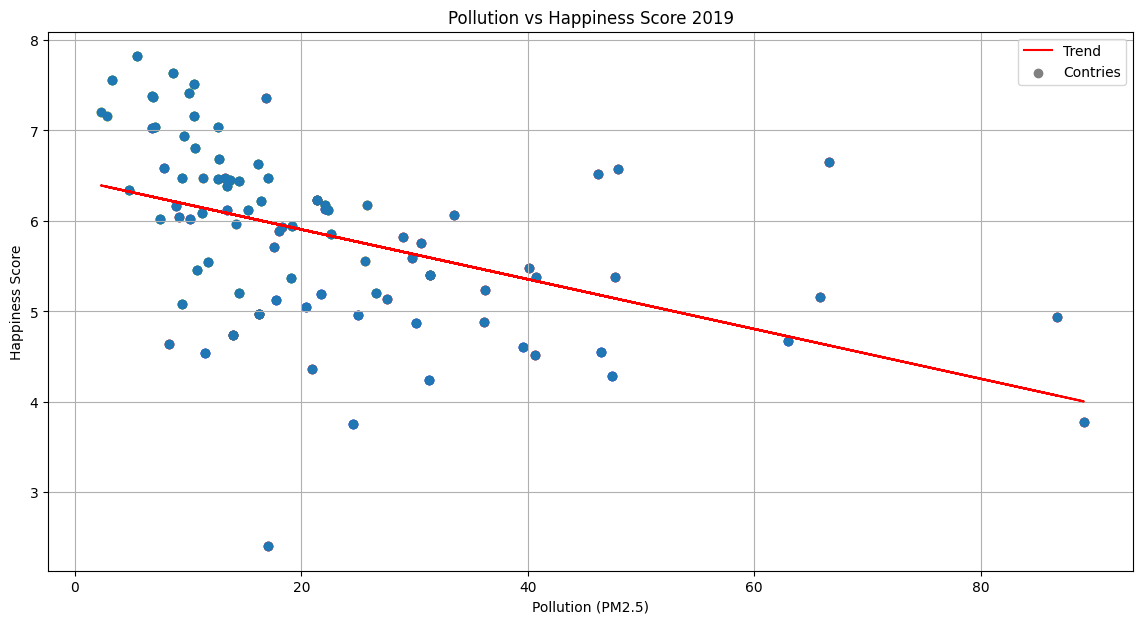

In [36]:
x = analysis.iloc[:, 2]
y = analysis.iloc[:, 3]

data_linreg = np.polyfit(x, y, 1)

xp = np.linspace(2, 2, 156)
lr = np.polyval(data_linreg, xp)

fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel('Pollution (PM2.5)')
ax.set_ylabel('Happiness Score')
ax.set_title('Pollution vs Happiness Score 2019')
model = np.polyfit(analysis['PM2.5'], analysis['Happiness Score'], 1)
ax.plot(analysis['PM2.5'], np.polyval(model, analysis['PM2.5']), color='r')

continents = analysis['Continent']  # Anta att du har en kolumn för kontinenterna i din DataFrame
ax.scatter(x, y, color='grey')
continent_colors = {'Europe': 'green', 'North America': 'purple',  'South America': 'orange', 'Asia': 'red', 'Africa': 'blue', 'Oceania': 'yellow'}
for continent, color in continent_colors.items():
    # Hämta index för länder i nuvarande kontinent
    continent_indices = (continents == continent)
    # Rita scatterplotten för länder i nuvarande kontinent med färgen för kontinenten
    ax.scatter(x[continent_indices], y[continent_indices], color=color, label=continent)


ax.scatter(x, y)
ax.plot(xp, lr)
ax.legend(["Trend", "Contries"])

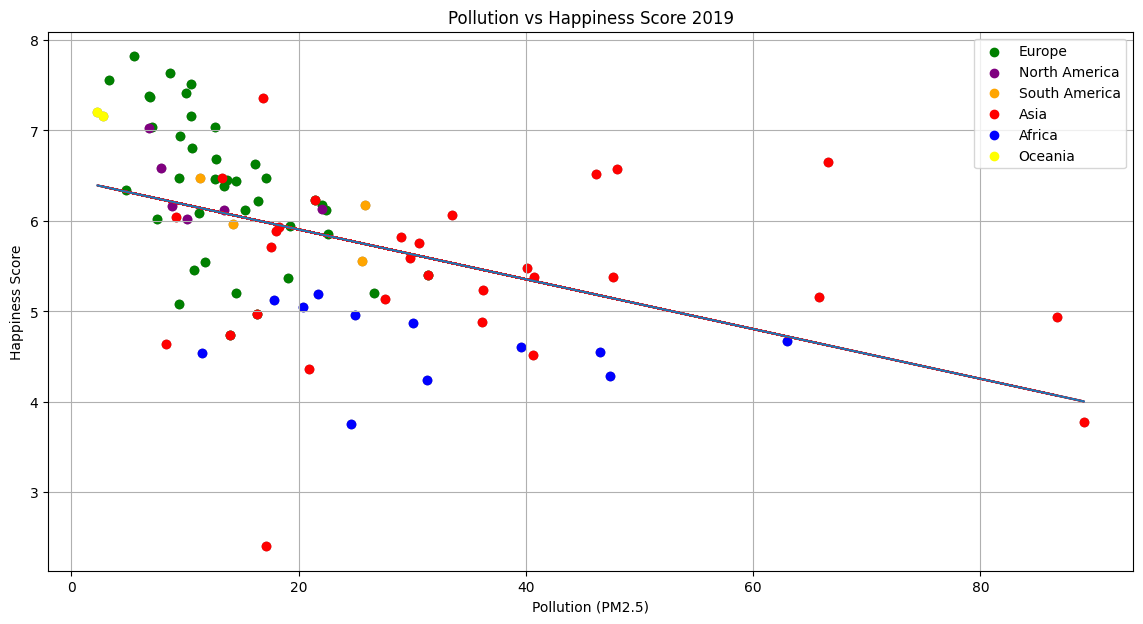

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = analysis.iloc[:, 2]
y = analysis.iloc[:, 3]
continents = analysis['Continent']  # Anta att du har en kolumn för kontinenterna i din DataFrame

data_linreg = np.polyfit(x, y, 1)
xp = np.linspace(x.min(), x.max(), 156)
lr = np.polyval(data_linreg, xp)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel('Pollution (PM2.5)')
ax.set_ylabel('Happiness Score')
ax.set_title('Pollution vs Happiness Score 2019')

model = np.polyfit(analysis['PM2.5'], analysis['Happiness Score'], 1)
ax.plot(analysis['PM2.5'], np.polyval(model, analysis['PM2.5']), color='r')


ax.scatter(x, y, color='grey')


continent_colors = {'Europe': 'green', 'North America': 'purple',  'South America': 'orange', 'Asia': 'red', 'Africa': 'blue', 'Oceania': 'yellow'}

for continent, color in continent_colors.items():
    # Hämta index för länder i nuvarande kontinent
    continent_indices = (continents == continent)
    # Rita scatterplotten för länder i nuvarande kontinent med färgen för kontinenten
    ax.scatter(x[continent_indices], y[continent_indices], color=color, label=continent)
ax.plot(xp, lr)
ax.legend()
plt.show()